#### Importing Dependancies:

In [67]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import gdown
import os

#### Downloading Data:

In [55]:
url = 'https://drive.google.com/u/0/uc?id=1WYUG8o9K06tCIagINu4o2ahygN4H7ZcV&export=download'
output = 'dataset.zip'
gdown.download(url,output)
gdown.extractall('dataset.zip','Data/')

Downloading...
From: https://drive.google.com/u/0/uc?id=1WYUG8o9K06tCIagINu4o2ahygN4H7ZcV&export=download
To: /content/dataset.zip
100%|██████████| 162M/162M [00:00<00:00, 289MB/s]


['Data/test/fresh cotton leaf/d (341).jpg',
 'Data/test/diseased cotton leaf/dis_leaf (124).jpg',
 'Data/test/diseased cotton plant/dd (513).jpg',
 'Data/test/fresh cotton plant/dsd (600).jpg',
 'Data/test/diseased cotton leaf/dis_leaf (248).jpg',
 'Data/test/fresh cotton plant/dsd (405).jpg',
 'Data/test/fresh cotton plant/dsd (632).jpg',
 'Data/test/fresh cotton leaf/d (366).jpg',
 'Data/test/fresh cotton leaf/d (378).jpg',
 'Data/test/fresh cotton leaf/d (384).jpg',
 'Data/test/test data comp files/dis_leaf (322)_compressed.jpg',
 'Data/test/test data comp files/dis_leaf (124)_compressed.jpg',
 'Data/test/fresh cotton plant/dsd (228).jpg',
 'Data/test/fresh cotton leaf/d (396).jpg',
 'Data/test/diseased cotton plant/dd (706).jpg',
 'Data/test/test data comp files/dd (328)_compressed.jpg',
 'Data/test/test data comp files/d (378)_compressed.jpg',
 'Data/test/diseased cotton plant/dd (41).jpg',
 'Data/test/test data comp files/d (366)_compressed.jpg',
 'Data/test/test data comp files/

#### Checking Data:

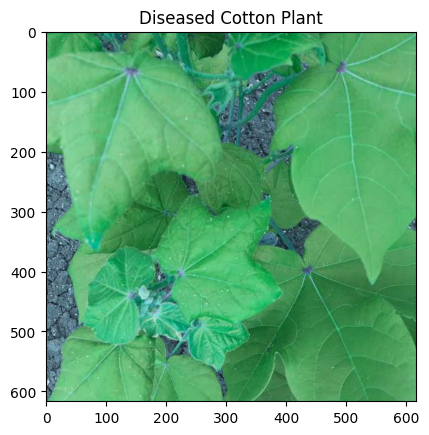

In [56]:
img = os.path.join('Data','train','diseased cotton plant','dd (139)_iaip.jpg')
img = cv2.imread(img)
plt.imshow(img)
plt.title("Diseased Cotton Plant")
plt.show()

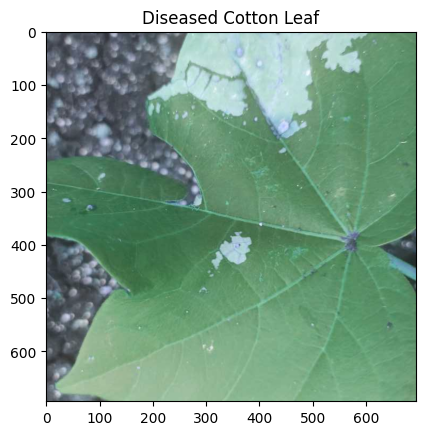

In [57]:
img2 = os.path.join('Data','train','diseased cotton leaf','dis_leaf (107)_iaip.jpg')
img2 = cv2.imread(img2)
plt.imshow(img2)
plt.title("Diseased Cotton Leaf")
plt.show()

#### Combine the data:

In [58]:
train_base_dir = 'Data/train'
test_base_dir = 'Data/test'
val_base_dir = 'Data/val'

In [59]:
X_train = []
y_train = []
img_size = 150
labels = ['diseased cotton leaf','diseased cotton plant','fresh cotton leaf','fresh cotton plant']
for label in labels:
    folder_path = os.path.join(train_base_dir,label)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(img_size,img_size))
        X_train.append(image)
        y_train.append(labels.index(label))

for label in labels:
    folder_path = os.path.join(test_base_dir,label)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(img_size,img_size))
        X_train.append(image)
        y_train.append(labels.index(label))

for label in labels:
    folder_path = os.path.join(val_base_dir,label)
    for img in os.listdir(folder_path):
        img_path = os.path.join(folder_path,img)
        image = cv2.imread(img_path)
        image = cv2.resize(image,(img_size,img_size))
        X_train.append(image)
        y_train.append(labels.index(label))

In [60]:
X_train = np.array(X_train)
y_train = np.array(y_train)

#### Shuffle the Data:

In [61]:
X_train, y_train = shuffle(X_train,y_train,random_state=2)
X_train.shape

(2293, 150, 150, 3)

#### Check first 10 Images of data:

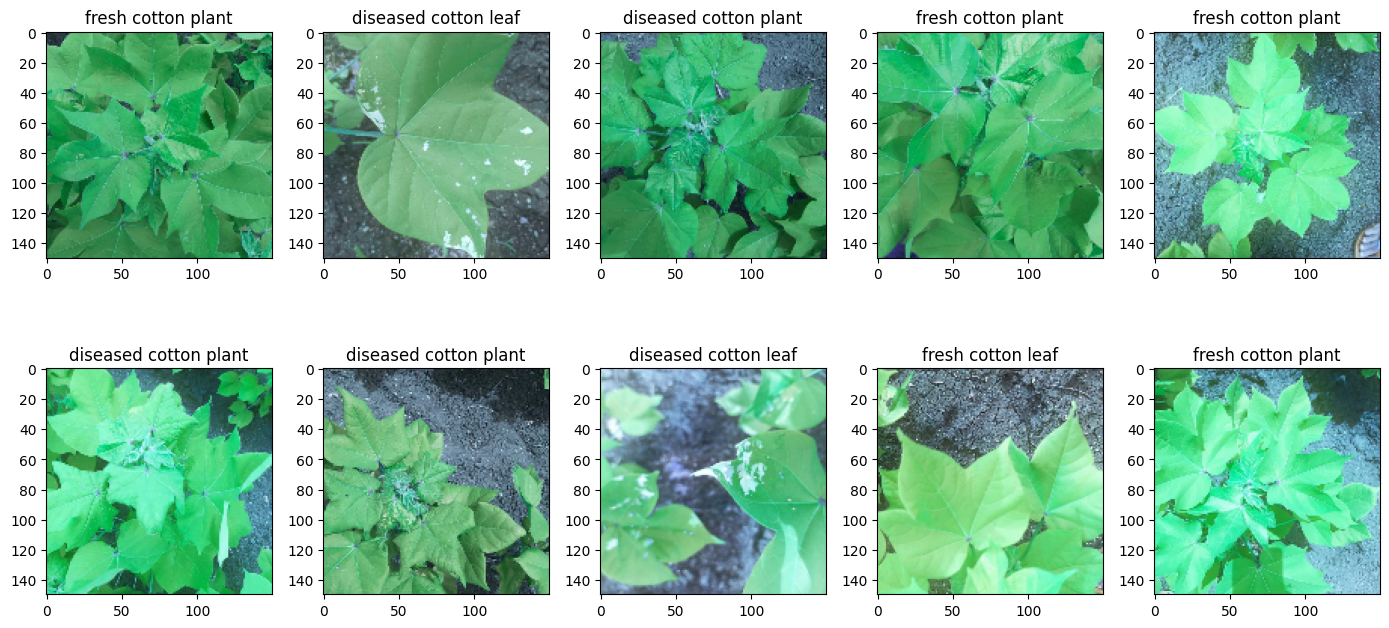

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(14, 7))

for ax, img, label in zip(axes.flatten(), X_train[:10], y_train[:10]):
    ax.imshow(img)
    ax.set_title(labels[label])

plt.tight_layout()
plt.show()

#### Split the Data:

In [65]:
X_train, X_test, y_train, y_test  = train_test_split(X_train,y_train,test_size=0.1,random_state=42)

In [66]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [68]:
X_train[0].shape

(150, 150, 3)

#### Model Building:

In [82]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))

In [83]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [84]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 conv2d_25 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 73, 73, 64)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_27 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

#### Training Model:

In [85]:
hist = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
58/58 [==============================] - 11s 103ms/step - loss: 2.1135 - accuracy: 0.3675 - val_loss: 1.2757 - val_accuracy: 0.4493
Epoch 2/30
58/58 [==============================] - 6s 95ms/step - loss: 1.2015 - accuracy: 0.4612 - val_loss: 1.0538 - val_accuracy: 0.5556
Epoch 3/30
58/58 [==============================] - 5s 95ms/step - loss: 0.9673 - accuracy: 0.5781 - val_loss: 0.8822 - val_accuracy: 0.5749
Epoch 4/30
58/58 [==============================] - 5s 94ms/step - loss: 0.9140 - accuracy: 0.6067 - val_loss: 0.9380 - val_accuracy: 0.5942
Epoch 5/30
58/58 [==============================] - 6s 98ms/step - loss: 0.8598 - accuracy: 0.6228 - val_loss: 0.8268 - val_accuracy: 0.6087
Epoch 6/30
58/58 [==============================] - 5s 94ms/step - loss: 0.8222 - accuracy: 0.6336 - val_loss: 0.8468 - val_accuracy: 0.6425
Epoch 7/30
58/58 [==============================] - 5s 94ms/step - loss: 0.7747 - accuracy: 0.6767 - val_loss: 0.9628 - val_accuracy: 0.6184
Epoch 8/30


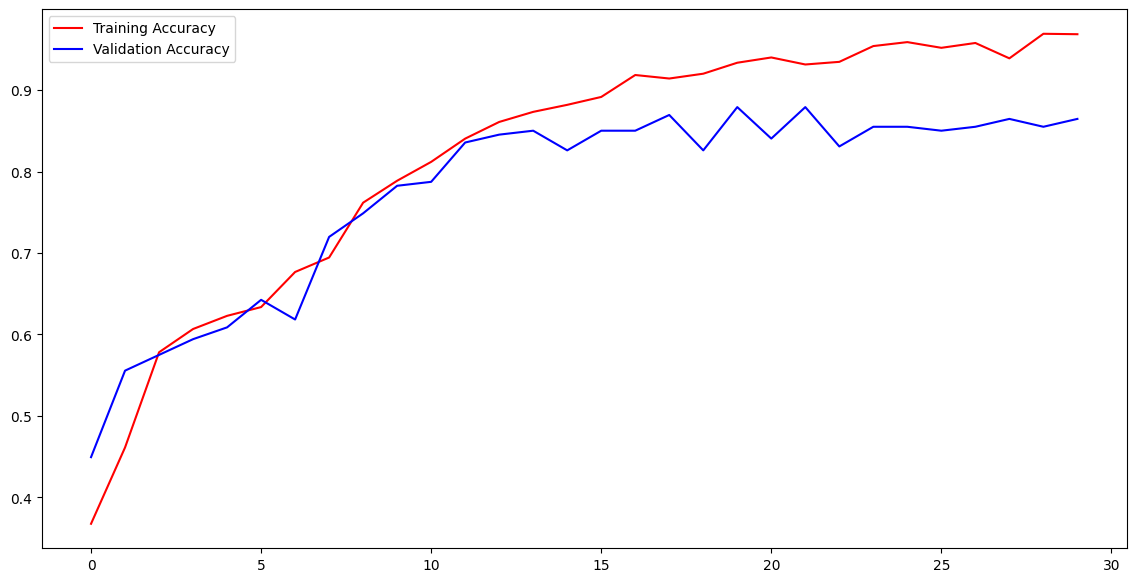

In [86]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

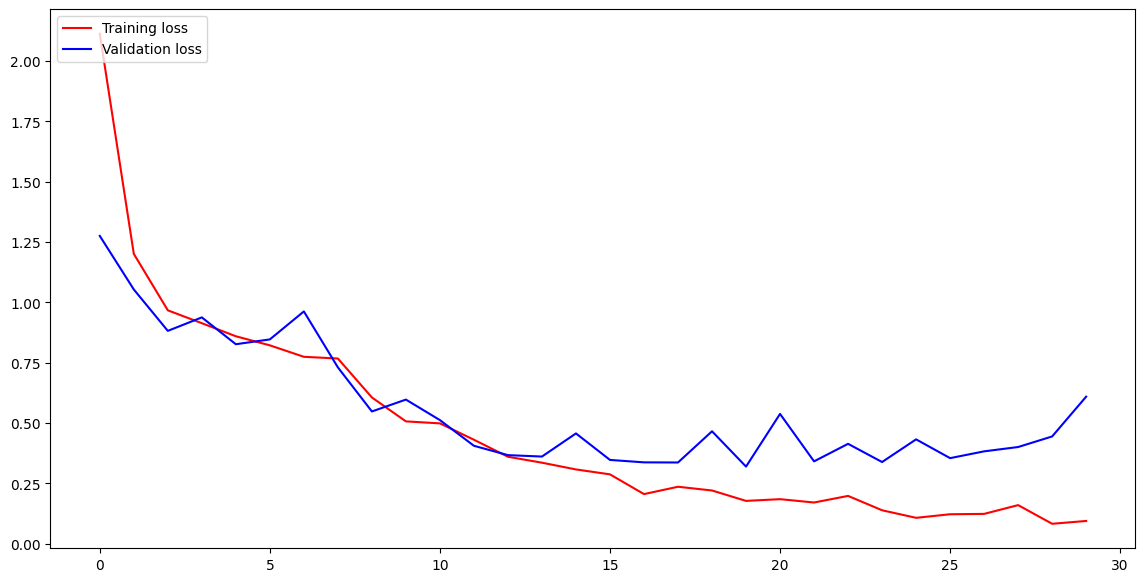

In [87]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

#### Prediction:

In [88]:
img_path = 'Data/test/diseased cotton plant/dd (41).jpg'
img = cv2.imread(img_path)
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [89]:
img_array = np.expand_dims(img_array,axis=0)
img_array.shape

(1, 150, 150, 3)

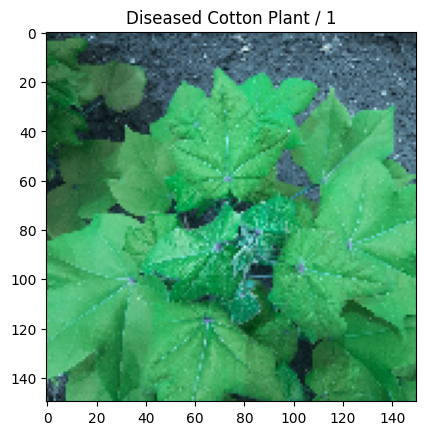

In [91]:
plt.imshow(img)
plt.title('Diseased Cotton Plant / 1')
plt.show()

In [95]:
result = model.predict(img_array)
result = np.argmax(result,axis=1)
print(result)

1/1 [==============================] - 0s 28ms/step
[1]


#### Test Data Predictions:

In [96]:
y_pred = model.predict(X_test)

8/8 [==============================] - 1s 103ms/step


In [97]:
y_pred = np.argmax(y_pred,axis=1)
y_test = np.argmax(y_test,axis=1)

In [100]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[29,  1,  7,  1],
       [ 0, 80,  0,  8],
       [ 0,  0, 48,  3],
       [ 0,  9,  1, 43]])

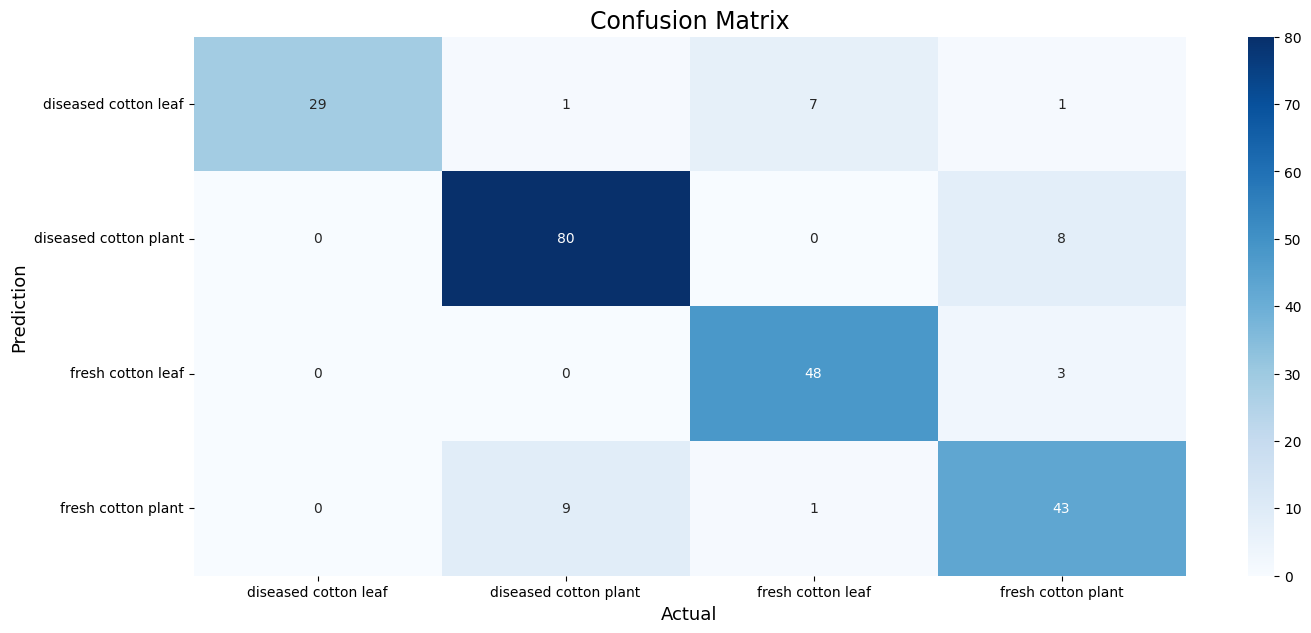

In [101]:
plt.figure(figsize=(16,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=labels,
            yticklabels=labels)
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,target_names=labels))

                       precision    recall  f1-score   support

 diseased cotton leaf       1.00      0.76      0.87        38
diseased cotton plant       0.89      0.91      0.90        88
    fresh cotton leaf       0.86      0.94      0.90        51
   fresh cotton plant       0.78      0.81      0.80        53

             accuracy                           0.87       230
            macro avg       0.88      0.86      0.86       230
         weighted avg       0.88      0.87      0.87       230



In [103]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)
precision = precision_score(y_test, y_pred,average='weighted')
print('Precision: ',precision)
recall = recall_score(y_test, y_pred,average='weighted')
print('Recall: ',recall)
f1 = f1_score(y_test, y_pred,average='weighted')
print('F1 score: ',f1)

Accuracy:  0.8695652173913043
Precision:  0.8755342242298764
Recall:  0.8695652173913043
F1 score:  0.8693798218828844


#### Save Model:

In [104]:
model.save('cotton_disease_prediction.h5')